In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
from time import time

In [2]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [3]:
Base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [4]:
standard_scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(standard_scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(standard_scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(standard_scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

In [5]:
#Calculate ความแตกต่างของค่า ราคา 'Adj Close','MSFT')ย้อนหลัง
backHistory = [30, 45, 60, 90, 180, 240] 
return_period = 2
BH1, BH2, BH3 = backHistory[1], backHistory[3], backHistory[4]
Y = Base. shift(-return_period)
X4_BH1 = Base.diff( BH1).shift( - BH1)
X4_BH2 = Base.diff( BH2).shift( - BH2)
X4_BH3 = Base.diff( BH3).shift( - BH3)

X4 = pd.concat([X4_BH1, X4_BH2, X4_BH3], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(standard_scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

### Data Preparation


In [6]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [7]:
dataset.dropna(inplace=True)
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-23,73.884651,-1.112010,0.426518,0.150358,0.193956,-1.226988,-1.335744,-1.126136,0.027694,0.047688,-0.148109
2017-10-24,74.006813,-1.107302,0.171594,0.180290,0.072763,-1.220891,-1.294394,-1.115762,0.026683,0.034530,-0.117109
2017-10-25,78.752045,-1.102562,0.006274,0.154963,0.274227,-1.238491,-1.322068,-1.107693,0.029171,0.063419,-0.124618
2017-10-26,78.827217,-1.102626,0.013221,0.157266,0.162478,-1.233717,-1.304473,-1.099625,0.043464,0.080022,-0.101266
2017-10-27,78.160072,-1.035200,0.018778,0.168778,0.047580,-1.203350,-1.296259,-1.272527,-0.192085,-0.028764,-0.250058
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,308.961395,1.432737,1.118723,0.358731,0.483560,1.360857,1.347085,1.112375,0.204820,-1.568069,-2.689162
2022-01-28,306.755768,1.571452,1.294652,0.328799,0.533926,1.515611,1.486241,0.786166,0.051652,-1.982510,-2.672912
2022-01-31,311.425262,1.633771,1.212019,0.329950,0.568553,1.638574,1.586387,0.459956,-0.313697,-2.312070,-2.719472
2022-02-01,299.294525,1.708475,1.386170,0.278145,0.672432,1.684101,1.653756,0.129136,-0.805770,-2.691553,-2.714483


In [8]:
Y = pd.DataFrame()
Y = dataset.iloc[:, 0:1]
X = dataset.drop(dataset.columns[0],axis = 1)
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-23,-1.112010,0.426518,0.150358,0.193956,-1.226988,-1.335744,-1.126136,0.027694,0.047688,-0.148109
2017-10-24,-1.107302,0.171594,0.180290,0.072763,-1.220891,-1.294394,-1.115762,0.026683,0.034530,-0.117109
2017-10-25,-1.102562,0.006274,0.154963,0.274227,-1.238491,-1.322068,-1.107693,0.029171,0.063419,-0.124618
2017-10-26,-1.102626,0.013221,0.157266,0.162478,-1.233717,-1.304473,-1.099625,0.043464,0.080022,-0.101266
2017-10-27,-1.035200,0.018778,0.168778,0.047580,-1.203350,-1.296259,-1.272527,-0.192085,-0.028764,-0.250058
...,...,...,...,...,...,...,...,...,...,...
2022-01-27,1.432737,1.118723,0.358731,0.483560,1.360857,1.347085,1.112375,0.204820,-1.568069,-2.689162
2022-01-28,1.571452,1.294652,0.328799,0.533926,1.515611,1.486241,0.786166,0.051652,-1.982510,-2.672912
2022-01-31,1.633771,1.212019,0.329950,0.568553,1.638574,1.586387,0.459956,-0.313697,-2.312070,-2.719472
2022-02-01,1.708475,1.386170,0.278145,0.672432,1.684101,1.653756,0.129136,-0.805770,-2.691553,-2.714483


In [9]:
dataCorr = X.corr()

<AxesSubplot:>

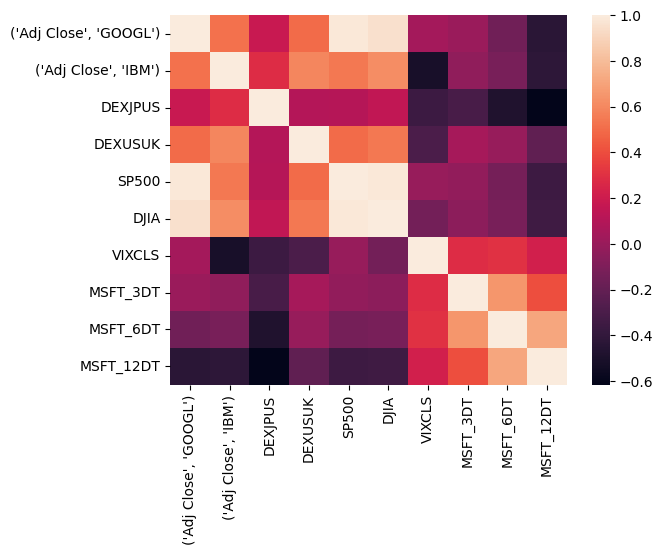

In [10]:
sns.heatmap(dataCorr)

In [11]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.519085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.180324,0.286229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.495622,0.593476,0.097019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.983735,0.539350,0.105035,0.500102,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.955296,0.619171,0.149825,0.544894,0.983862,0.000000,0.000000,0.000000,0.000000,0.0
6,0.042151,-0.512233,-0.362571,-0.297632,-0.005115,-0.137353,0.000000,0.000000,0.000000,0.0
7,0.003271,-0.031685,-0.309732,0.049336,-0.026080,-0.042716,0.282476,0.000000,0.000000,0.0
8,-0.151562,-0.124006,-0.482866,-0.008681,-0.130890,-0.121364,0.299302,0.652356,0.000000,0.0
9,-0.436864,-0.423574,-0.616721,-0.218412,-0.357669,-0.346078,0.217597,0.402076,0.712462,0.0


In [12]:
to_drop = [column for column in lower if any(lower[column] > 0.9)]
X.drop(to_drop, inplace=True, axis=1)


In [13]:
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=seed)

### Create Model List

In [14]:
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [15]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)
params_LR

{'fit_intercept': [True, False], 'normalize': [True, False]}

In [16]:
kernel = ['linear', 'rbf', 'poly']
C_list = [10, 100]
ep_list = [0.1, 1, 5]
gamma = [0.01, 0.1]
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

In [17]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR

    grid = GridSearchCV( estimator=model, n_jobs = 1,
                        verbose = 10,
                        cv = 4,
                        scoring = 'neg_mean_squared_error',
                        param_grid = params )
    grid_result = grid.fit(X_train, Y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/4; 1/4] END fit_intercept=True, normalize=True;, score=-238.772 total time=   0.0s
[CV 2/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/4; 1/4] END fit_intercept=True, normalize=True;, score=-228.057 total time=   0.0s
[CV 3/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/4; 1/4] END fit_intercept=True, normalize=True;, score=-227.829 total time=   0.0s
[CV 4/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 4/4; 1/4] END fit_intercept=True, normalize=True;, score=-219.619 total time=   0.0s
[CV 1/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/4; 2/4] END fit_intercept=True, normalize=False;, score=-238.772 total time=   0.0s
[CV 2/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/4;

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Progra

[CV 1/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-725.744 total time=   0.0s
[CV 2/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 2/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-579.557 total time=   0.0s
[CV 3/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 3/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-643.801 total time=   0.0s
[CV 4/4; 2/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf........
[CV 4/4; 2/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-580.100 total time=   0.0s
[CV 1/4; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 1/4; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5890.034 total time=   0.0s
[CV 2/4; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 2/4; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-235.771 total time=   0.0s
[CV 3/4; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 3/4; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-249.800 total time=   0.0s
[CV 4/4; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 4/4; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-231.627 total time=   0.0s
[CV 1/4; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 1/4; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-153.473 total time=   0.0s
[CV 2/4; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 2/4; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-130.700 total time=   0.0s
[CV 3/4; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-166.210 total time=   0.0s
[CV 4/4; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 4/4; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-146.756 total time=   0.0s
[CV 1/4; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 1/4; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-877.667 total time=   0.0s
[CV 2/4; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 2/4; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-888.907 total time=   0.0s
[CV 3/4; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 3/4; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-967.344 total time=   0.0s
[CV 4/4; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 4/4; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, ker

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-230.450 total time=   0.0s
[CV 1/4; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 1/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-721.782 total time=   0.0s
[CV 2/4; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 2/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-575.327 total time=   0.0s
[CV 3/4; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 3/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-648.166 total time=   0.0s
[CV 4/4; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 4/4; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-574.838 total time=   0.0s
[CV 1/4; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 1/4; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=po

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-254.692 total time=   0.0s
[CV 4/4; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 4/4; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-230.450 total time=   0.0s
[CV 1/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 1/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-154.192 total time=   0.0s
[CV 2/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 2/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-130.502 total time=   0.0s
[CV 3/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 3/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-165.511 total time=   0.0s
[CV 4/4; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 4/4; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-234.751 total time=   0.0s
[CV 3/4; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 3/4; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-242.781 total time=   0.0s
[CV 4/4; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 4/4; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-224.933 total time=   0.0s
[CV 1/4; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/4; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-783.649 total time=   0.0s
[CV 2/4; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/4; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-605.818 total time=   0.0s
[CV 3/4; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 3/4; 14/72] END C=10, degree=2, epsilon=5, gamma=0.0

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-264.701 total time=   0.0s
[CV 2/4; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 2/4; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-234.751 total time=   0.0s
[CV 3/4; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 3/4; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-242.781 total time=   0.0s
[CV 4/4; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 4/4; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-224.933 total time=   0.0s
[CV 1/4; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 1/4; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-160.220 total time=   0.0s
[CV 2/4; 17/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 2/4; 17/72] END C=10, degree=2, epsilon=5, gamma=0.1, 

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-267.620 total time=   0.0s
[CV 2/4; 19/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear....
[CV 2/4; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-235.771 total time=   0.0s
[CV 3/4; 19/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear....
[CV 3/4; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-249.800 total time=   0.0s
[CV 4/4; 19/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear....
[CV 4/4; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-231.627 total time=   0.0s
[CV 1/4; 20/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf.......
[CV 1/4; 20/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-725.744 total time=   0.0s
[CV 2/4; 20/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf.......
[CV 2/4; 20/72] END C=10, degree=3, epsilon

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-6124.097 total time=   0.0s
[CV 1/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 1/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-267.620 total time=   0.0s
[CV 2/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 2/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-235.771 total time=   0.0s
[CV 3/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 3/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-249.800 total time=   0.0s
[CV 4/4; 22/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear.....
[CV 4/4; 22/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-231.627 total time=   0.0s
[CV 1/4; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 1/4; 23/72] END C=10, degree=3, epsilon=0

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-648.166 total time=   0.0s
[CV 4/4; 26/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 4/4; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-574.838 total time=   0.0s
[CV 1/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 1/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-6227.883 total time=   0.0s
[CV 2/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 2/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5153.793 total time=   0.0s
[CV 3/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 3/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-6289.219 total time=   0.0s
[CV 4/4; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 4/4; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, 

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-154.192 total time=   0.0s
[CV 2/4; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 2/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-130.502 total time=   0.0s
[CV 3/4; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 3/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-165.511 total time=   0.0s
[CV 4/4; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 4/4; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-145.595 total time=   0.0s
[CV 1/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-970.882 total time=   0.0s
[CV 2/4; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/4; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-242.781 total time=   0.0s
[CV 4/4; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 4/4; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-224.933 total time=   0.0s
[CV 1/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-783.649 total time=   0.0s
[CV 2/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-605.818 total time=   0.0s
[CV 3/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 3/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-681.388 total time=   0.0s
[CV 4/4; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 4/4; 32/72] END C=10, degree=3, epsilon=5, gamma=0.01, 

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-234.751 total time=   0.0s
[CV 3/4; 34/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear.......
[CV 3/4; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-242.781 total time=   0.0s
[CV 4/4; 34/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear.......
[CV 4/4; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-224.933 total time=   0.0s
[CV 1/4; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 1/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-160.220 total time=   0.0s
[CV 2/4; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 2/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-145.715 total time=   0.0s
[CV 3/4; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 3/4; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, ker

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-262.926 total time=   0.0s
[CV 2/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 2/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-233.898 total time=   0.0s
[CV 3/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 3/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-251.215 total time=   0.0s
[CV 4/4; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-231.055 total time=   0.0s
[CV 1/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-193.085 total time=   0.0s
[CV 2/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-169.935 total time=   0.0s
[CV 3/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 3/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-205.583 total time=   0.0s
[CV 4/4; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 4/4; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-185.892 total time=   0.0s
[CV 1/4; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/4; 39/72] END C=100, degree=2, epsilon=0.

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-262.926 total time=   0.0s
[CV 2/4; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-233.898 total time=   0.0s
[CV 3/4; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 3/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-251.215 total time=   0.0s
[CV 4/4; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-231.055 total time=   0.0s
[CV 1/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-60.405 total time=   0.0s
[CV 2/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-63.038 total time=   0.0s
[CV 3/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 3/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-82.144 total time=   0.0s
[CV 4/4; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 4/4; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-72.800 total time=   0.0s
[CV 1/4; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/4; 42/72] END C=100, degree=2, epsilon=0.1, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-253.106 total time=   0.0s
[CV 4/4; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 4/4; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-231.751 total time=   0.0s
[CV 1/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-192.195 total time=   0.0s
[CV 2/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-169.334 total time=   0.0s
[CV 3/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 3/4; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-204.454 total time=   0.0s
[CV 4/4; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 4/4; 44/72] END C=100, degree=2, epsilon=1, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-3432.334 total time=   0.0s
[CV 4/4; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 4/4; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-3153.721 total time=   0.0s
[CV 1/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-261.722 total time=   0.0s
[CV 2/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 2/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-233.960 total time=   0.0s
[CV 3/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-253.106 total time=   0.0s
[CV 4/4; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 4/4; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-231.751 total time=   0.0s
[CV 1/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-59.219 total time=   0.0s
[CV 2/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-61.746 total time=   0.0s
[CV 3/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 3/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-79.264 total time=   0.0s
[CV 4/4; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 4/4; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, ker

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-243.635 total time=   0.0s
[CV 4/4; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 4/4; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-225.321 total time=   0.0s
[CV 1/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-189.134 total time=   0.0s
[CV 2/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 2/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-163.973 total time=   0.0s
[CV 3/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 3/4; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-200.228 total time=   0.0s
[CV 4/4; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 4/4; 50/72] END C=100, degree=2, epsilon=5, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y wa

[CV 4/4; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-3101.327 total time=   0.0s
[CV 1/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 1/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-264.040 total time=   0.0s
[CV 2/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-233.533 total time=   0.0s
[CV 3/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 3/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-243.635 total time=   0.0s
[CV 4/4; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-225.321 total time=   0.0s
[CV 1/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-58.483 total time=   0.0s
[CV 2/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-57.949 total time=   0.0s
[CV 3/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 3/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-74.762 total time=   0.0s
[CV 4/4; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 4/4; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-70.113 total time=   0.0s
[CV 1/4; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/4; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-262.926 total time=   0.0s
[CV 2/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 2/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-233.898 total time=   0.0s
[CV 3/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-251.215 total time=   0.0s
[CV 4/4; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 4/4; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-231.055 total time=   0.0s
[CV 1/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-193.085 total time=   0.0s
[CV 2/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-169.935 total time=   0.0s
[CV 3/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 3/4; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-205.583 total time=   0.0s
[CV 4/4; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 4/4; 56/72] END C=100, degree=3, epsilon

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5516.742 total time=   0.0s
[CV 2/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-4621.620 total time=   0.0s
[CV 3/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 3/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5671.047 total time=   0.0s
[CV 4/4; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 4/4; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5484.202 total time=   0.0s
[CV 1/4; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-262.926 total time=   0.0s
[CV 2/4; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/4; 58/72] END C=100, degree=3, eps

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-251.215 total time=   0.0s
[CV 4/4; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 4/4; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-231.055 total time=   0.0s
[CV 1/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-60.405 total time=   0.0s
[CV 2/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-63.038 total time=   0.0s
[CV 3/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 3/4; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-82.144 total time=   0.0s
[CV 4/4; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 4/4; 59/72] END C=100, degree=3, epsilon=0.1, ga

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-450.563 total time=   0.0s
[CV 1/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-261.722 total time=   0.0s
[CV 2/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 2/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-233.960 total time=   0.0s
[CV 3/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-253.106 total time=   0.0s
[CV 4/4; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 4/4; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-231.751 total time=   0.0s
[CV 1/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-192.195 total time=   0.0s
[CV 2/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-169.334 total time=   0.0s
[CV 3/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 3/4; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-204.454 total time=   0.0s
[CV 4/4; 62/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf........
[CV 4/4; 62/72] END C=100, degree=3, epsilon=1, gamma=

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5519.970 total time=   0.0s
[CV 2/4; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/4; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-4614.459 total time=   0.0s
[CV 3/4; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 3/4; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5687.448 total time=   0.0s
[CV 4/4; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 4/4; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5487.213 total time=   0.0s
[CV 1/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-261.722 total time=   0.0s
[CV 2/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-233.960 total time=   0.0s
[CV 3/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 3/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-253.106 total time=   0.0s
[CV 4/4; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 4/4; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-231.751 total time=   0.0s
[CV 1/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-59.219 total time=   0.0s
[CV 2/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-61.746 total time=   0.0s
[CV 3/4; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 3/4; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1,

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-264.040 total time=   0.0s
[CV 2/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 2/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-233.533 total time=   0.0s
[CV 3/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 3/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-243.635 total time=   0.0s
[CV 4/4; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 4/4; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-225.321 total time=   0.0s
[CV 1/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y wa

[CV 1/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-189.134 total time=   0.0s
[CV 2/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 2/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-163.973 total time=   0.0s
[CV 3/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 3/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-200.228 total time=   0.0s
[CV 4/4; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 4/4; 68/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf;, score=-180.376 total time=   0.0s
[CV 1/4; 69/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/4; 69/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-5498.361 total time=   0.0s
[CV 2/4; 69/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly.......
[CV 2/4; 69/72] END C=100, degree=3, epsilon=5, gamma=0.01

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-233.533 total time=   0.0s
[CV 3/4; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 3/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-243.635 total time=   0.0s
[CV 4/4; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 4/4; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-225.321 total time=   0.0s
[CV 1/4; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/4; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-58.483 total time=   0.0s
[CV 2/4; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/4; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-57.949 total time=   0.0s
[CV 3/4; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 3/4; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1,

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

In [18]:
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'C': 100, 'degree': 2, 'epsilon': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  -65.3269696992309


In [19]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
data_lr = []
data_rbf = []
data_poly = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    if param['kernel'] == 'linear':
        data_lr.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'rbf':
        data_rbf.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'poly':
        data_poly.append({'means': mean, 'stds': stdev})

-246.204612 (14.079345) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-632.300232 (59.938852) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-5603.457932 (475.862577) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-246.204612 (14.079345) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-149.284674 (12.804333) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-873.871299 (73.467624) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-246.520586 (13.869769) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-630.028212 (60.798504) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-5590.378444 (466.571956) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-246.520586 (13.869769) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.1, 'ke

<AxesSubplot:>

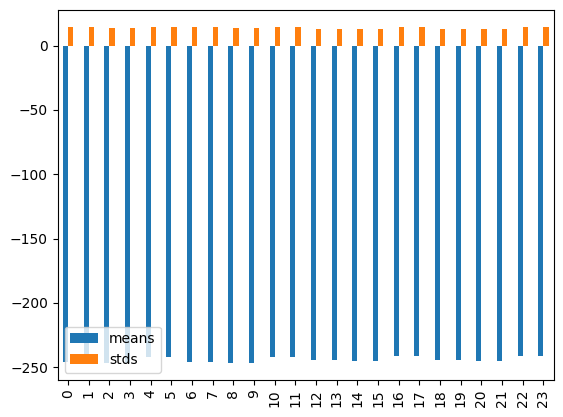

In [20]:
df_linear = pd.DataFrame(data=data_lr)
df_linear.plot.bar()

<AxesSubplot:>

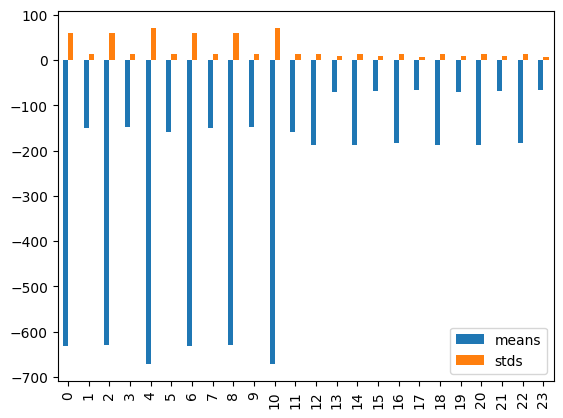

In [21]:
df_rbf = pd.DataFrame(data=data_rbf)
df_rbf.plot.bar()

<AxesSubplot:>

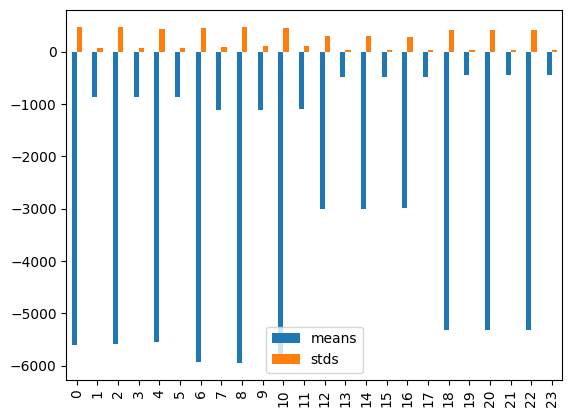

In [22]:
df_poly = pd.DataFrame(data=data_poly)
df_poly.plot.bar()

In [23]:
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [24]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

In [25]:
kernel = ['linear', 'rbf', 'poly']
C_list = list(np.linspace(0.1, 150, 5, dtype = float))
ep_list = list(np.linspace(0.1, 1, 5, dtype = float))
gamma = list(np.linspace(0.01, 0.1, 5, dtype = float))
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

In [26]:
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

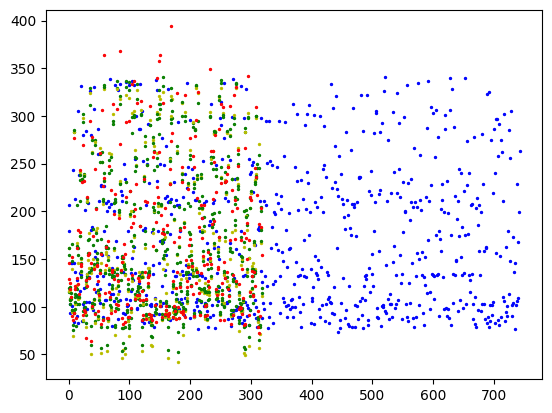

In [27]:
plt.scatter(np.arange(len(Y_train)),Y_train, edgecolors='b', s=2)
plt.scatter(np.arange(len(Y_test)),Y_test, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Linear)),SVR_Linear, edgecolors='y', s=2)
plt.scatter(np.arange(len(SVR_Rbf)),SVR_Rbf, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Poly)),SVR_Poly, edgecolors='r', s=2)
plt.show()

In [28]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR
    grid_rand = RandomizedSearchCV( estimator=model, n_jobs = 1, 
                                    verbose = 10,
                                    cv = 4,
                                    scoring = 'neg_mean_squared_error',
                                    param_distributions = params )
    grid_rand_result = grid_rand.fit(X_train, Y_train)

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Pytho

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/4; 1/4] END fit_intercept=True, normalize=True;, score=-238.772 total time=   0.0s
[CV 2/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/4; 1/4] END fit_intercept=True, normalize=True;, score=-228.057 total time=   0.0s
[CV 3/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/4; 1/4] END fit_intercept=True, normalize=True;, score=-227.829 total time=   0.0s
[CV 4/4; 1/4] START fit_intercept=True, normalize=True..........................
[CV 4/4; 1/4] END fit_intercept=True, normalize=True;, score=-219.619 total time=   0.0s
[CV 1/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/4; 2/4] END fit_intercept=True, normalize=False;, score=-238.772 total time=   0.0s
[CV 2/4; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/4;

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 2/10] END C=0.1, degree=3, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-1769.191 total time=   0.0s
[CV 4/4; 2/10] START C=0.1, degree=3, epsilon=0.1, gamma=0.0325, kernel=linear..
[CV 4/4; 2/10] END C=0.1, degree=3, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-1582.729 total time=   0.0s
[CV 1/4; 3/10] START C=150.0, degree=3, epsilon=0.55, gamma=0.0325, kernel=rbf..
[CV 1/4; 3/10] END C=150.0, degree=3, epsilon=0.55, gamma=0.0325, kernel=rbf;, score=-95.947 total time=   0.0s
[CV 2/4; 3/10] START C=150.0, degree=3, epsilon=0.55, gamma=0.0325, kernel=rbf..
[CV 2/4; 3/10] END C=150.0, degree=3, epsilon=0.55, gamma=0.0325, kernel=rbf;, score=-81.750 total time=   0.0s
[CV 3/4; 3/10] START C=150.0, degree=3, epsilon=0.55, gamma=0.0325, kernel=rbf..
[CV 3/4; 3/10] END C=150.0, degree=3, epsilon=0.55, gamma=0.0325, kernel=rbf;, score=-126.867 total time=   0.0s
[CV 4/4; 3/10] START C=150.0, degree=3, epsilon=0.55, gamma=0.0325, kernel=rbf..
[CV 4/4; 3/10] END C=150.0, de

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 4/10] END C=112.525, degree=2, epsilon=1.0, gamma=0.0775, kernel=linear;, score=-261.705 total time=   0.0s
[CV 2/4; 4/10] START C=112.525, degree=2, epsilon=1.0, gamma=0.0775, kernel=linear
[CV 2/4; 4/10] END C=112.525, degree=2, epsilon=1.0, gamma=0.0775, kernel=linear;, score=-233.967 total time=   0.0s
[CV 3/4; 4/10] START C=112.525, degree=2, epsilon=1.0, gamma=0.0775, kernel=linear
[CV 3/4; 4/10] END C=112.525, degree=2, epsilon=1.0, gamma=0.0775, kernel=linear;, score=-253.106 total time=   0.0s
[CV 4/4; 4/10] START C=112.525, degree=2, epsilon=1.0, gamma=0.0775, kernel=linear


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 4/4; 4/10] END C=112.525, degree=2, epsilon=1.0, gamma=0.0775, kernel=linear;, score=-231.751 total time=   0.0s
[CV 1/4; 5/10] START C=112.525, degree=3, epsilon=0.55, gamma=0.0325, kernel=linear
[CV 1/4; 5/10] END C=112.525, degree=3, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-261.489 total time=   0.0s
[CV 2/4; 5/10] START C=112.525, degree=3, epsilon=0.55, gamma=0.0325, kernel=linear
[CV 2/4; 5/10] END C=112.525, degree=3, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-234.341 total time=   0.0s
[CV 3/4; 5/10] START C=112.525, degree=3, epsilon=0.55, gamma=0.0325, kernel=linear


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 5/10] END C=112.525, degree=3, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-251.640 total time=   0.0s
[CV 4/4; 5/10] START C=112.525, degree=3, epsilon=0.55, gamma=0.0325, kernel=linear
[CV 4/4; 5/10] END C=112.525, degree=3, epsilon=0.55, gamma=0.0325, kernel=linear;, score=-232.055 total time=   0.0s
[CV 1/4; 6/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.0775, kernel=linear
[CV 1/4; 6/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.0775, kernel=linear;, score=-262.931 total time=   0.0s
[CV 2/4; 6/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.0775, kernel=linear


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 6/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.0775, kernel=linear;, score=-234.012 total time=   0.0s
[CV 3/4; 6/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.0775, kernel=linear
[CV 3/4; 6/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.0775, kernel=linear;, score=-250.404 total time=   0.0s
[CV 4/4; 6/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.0775, kernel=linear
[CV 4/4; 6/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.0775, kernel=linear;, score=-231.055 total time=   0.0s
[CV 1/4; 7/10] START C=150.0, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf
[CV 1/4; 7/10] END C=150.0, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf;, score=-73.903 total time=   0.0s
[CV 2/4; 7/10] START C=150.0, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf
[CV 2/4; 7/10] END C=150.0, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf;, score=-72.305 total time=   0.0s
[CV 3/4; 7/10] START C=150.0, degree=3, epsilon=0.775, 

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 3/4; 7/10] END C=150.0, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf;, score=-102.508 total time=   0.0s
[CV 4/4; 7/10] START C=150.0, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf
[CV 4/4; 7/10] END C=150.0, degree=3, epsilon=0.775, gamma=0.05500000000000001, kernel=rbf;, score=-91.708 total time=   0.0s
[CV 1/4; 8/10] START C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=poly.
[CV 1/4; 8/10] END C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=poly;, score=-5989.317 total time=   0.0s
[CV 2/4; 8/10] START C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=poly.
[CV 2/4; 8/10] END C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=poly;, score=-4970.001 total time=   0.0s
[CV 3/4; 8/10] START C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=poly.
[CV 3/4; 8/10] END C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=poly;, score=-6069.808 total time=   0.0s
[CV 4/4; 8/10] START C=37.575, degree=3, epsilon=0.325, gamma=0.01

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 1/4; 9/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf;, score=-5830.111 total time=   0.0s
[CV 2/4; 9/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf....
[CV 2/4; 9/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf;, score=-4686.923 total time=   0.0s
[CV 3/4; 9/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf....
[CV 3/4; 9/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf;, score=-5831.076 total time=   0.0s
[CV 4/4; 9/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf....
[CV 4/4; 9/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.0775, kernel=rbf;, score=-5617.118 total time=   0.0s
[CV 1/4; 10/10] START C=150.0, degree=3, epsilon=0.1, gamma=0.01, kernel=linear.
[CV 1/4; 10/10] END C=150.0, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-262.927 total time=   0.0s
[CV 2/4; 10/10] START C=150.0, degree=3, epsilon=0.1, gamma=0.01, kernel=linear.


c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

[CV 2/4; 10/10] END C=150.0, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-233.901 total time=   0.0s
[CV 3/4; 10/10] START C=150.0, degree=3, epsilon=0.1, gamma=0.01, kernel=linear.
[CV 3/4; 10/10] END C=150.0, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-251.137 total time=   0.0s
[CV 4/4; 10/10] START C=150.0, degree=3, epsilon=0.1, gamma=0.01, kernel=linear.
[CV 4/4; 10/10] END C=150.0, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-231.054 total time=   0.0s


In [29]:
print('Best params: ',grid_rand_result.best_params_)
print('Best score: ', grid_rand_result.best_score_)

Best params:  {'kernel': 'rbf', 'gamma': 0.05500000000000001, 'epsilon': 0.775, 'degree': 3, 'C': 150.0}
Best score:  -85.10569406147047


In [30]:
means = grid_rand_result.cv_results_['mean_test_score']
stds = grid_rand_result.cv_results_['std_test_score']
params = grid_rand_result.cv_results_['params']
data_linear = []
data_rbf = []
data_poly = []
all_data = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    all_data.append({'means': mean, 'stds': stdev})
    if param['kernel'] == 'linear':
        data_linear.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'rbf':
        data_rbf.append({'means': mean, 'stds': stdev})
    elif param['kernel'] == 'poly':
        data_poly.append({'means': mean, 'stds': stdev})

-5927.615011 (468.992597) with: {'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.775, 'degree': 2, 'C': 0.1}
-1701.925858 (245.370291) with: {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.1, 'degree': 3, 'C': 0.1}
-104.826240 (17.287446) with: {'kernel': 'rbf', 'gamma': 0.0325, 'epsilon': 0.55, 'degree': 3, 'C': 150.0}
-245.132460 (12.668398) with: {'kernel': 'linear', 'gamma': 0.0775, 'epsilon': 1.0, 'degree': 2, 'C': 112.525}
-244.881298 (12.217742) with: {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.55, 'degree': 3, 'C': 112.525}
-244.600655 (12.896545) with: {'kernel': 'linear', 'gamma': 0.0775, 'epsilon': 0.1, 'degree': 2, 'C': 75.05}
-85.105694 (12.607461) with: {'kernel': 'rbf', 'gamma': 0.05500000000000001, 'epsilon': 0.775, 'degree': 3, 'C': 150.0}
-5735.231928 (445.324621) with: {'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.325, 'degree': 3, 'C': 37.575}
-5491.307073 (472.517846) with: {'kernel': 'rbf', 'gamma': 0.0775, 'epsilon': 0.55, 'degree': 2, 'C': 0.1}
-244.7545

<AxesSubplot:>

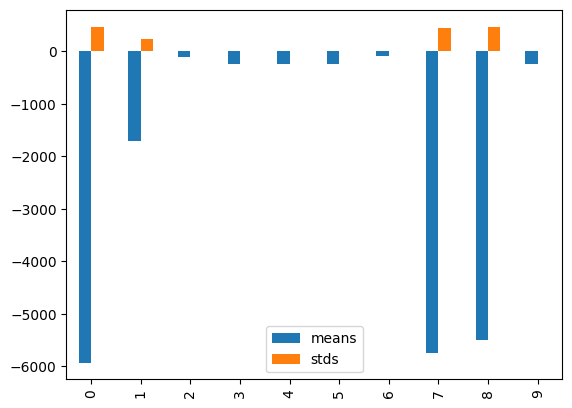

In [31]:
df_all = pd.DataFrame(data=all_data)
df_all.plot.bar()

<AxesSubplot:>

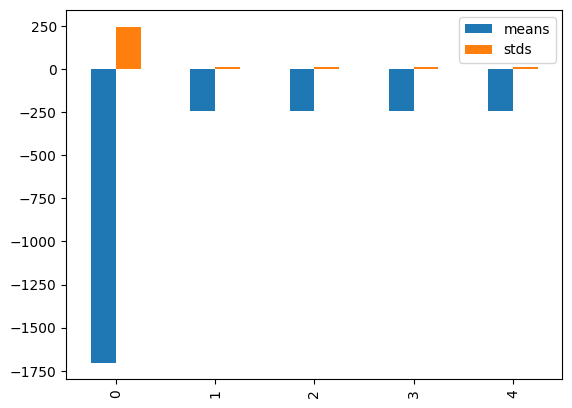

In [32]:
df_linear = pd.DataFrame(data=data_linear)
df_linear.plot.bar()

<AxesSubplot:>

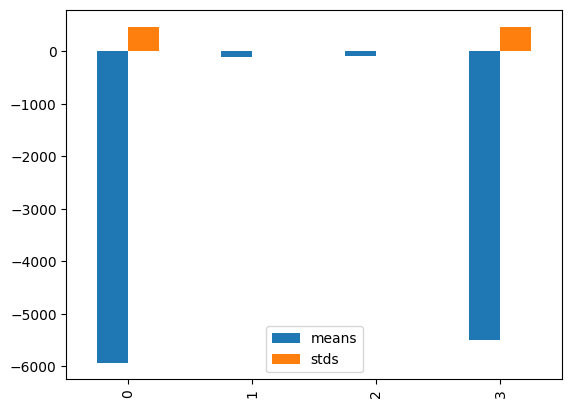

In [33]:
df_rbf = pd.DataFrame(data=data_rbf)
df_rbf.plot.bar()

<AxesSubplot:>

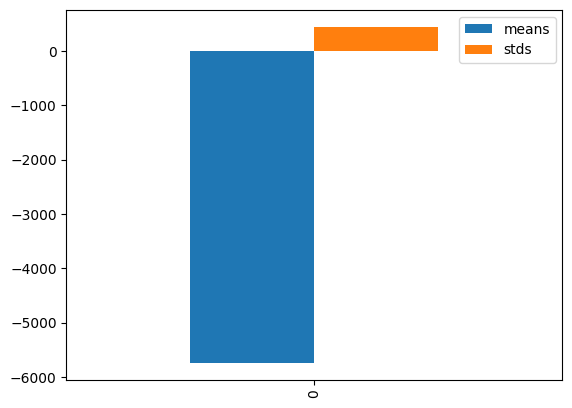

In [34]:
df_poly = pd.DataFrame(data=data_poly)
df_poly.plot.bar()

c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Nuchtu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support n

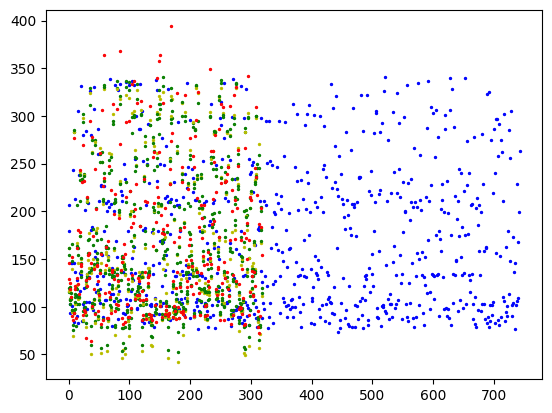

In [35]:
c_val = 100
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)
SVR_Linear = svr_lin.fit(X_train,Y_train).predict(X_test)
SVR_Rbf = svr_rbf.fit(X_train,Y_train).predict(X_test)
SVR_Poly = svr_poly.fit(X_train,Y_train).predict(X_test)
plt.scatter(np.arange(len(Y_train)),Y_train, edgecolors='b', s=2)
plt.scatter(np.arange(len(Y_test)),Y_test, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Linear)),SVR_Linear, edgecolors='y', s=2)
plt.scatter(np.arange(len(SVR_Rbf)),SVR_Rbf, edgecolors='g', s=2)
plt.scatter(np.arange(len(SVR_Poly)),SVR_Poly, edgecolors='r', s=2)
plt.show()